In [68]:
import numpy as np  
import pandas as pd 
%matplotlib inline  
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from datetime import datetime 
import itertools 
from matplotlib.ticker import NullFormatter 
import matplotlib.ticker as ticker 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [91]:
data=pd.read_csv('/Users/irina/Desktop/Data-Collisions-1.CSV', parse_dates=["INCDTTM",
                                                                            "INCDATE"])

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [71]:
data['ROADCOND'].isnull().sum() 
data['SPEEDING'].isnull().sum() 
data["SPEEDING"].value_counts() 
data["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [93]:
newdata=data.drop(columns=['X', 'Y','SEVERITYDESC', 'STATUS','LOCATION', 'SDOT_COLDESC','EXCEPTRSNDESC','PEDROWNOTGRNT','ST_COLDESC', 'SEGLANEKEY','HITPARKEDCAR','CROSSWALKKEY', 'SDOTCOLNUM','SEVERITYCODE.1', 'COLLISIONTYPE','EXCEPTRSNCODE', 'INTKEY','INCKEY', 'PERSONCOUNT', 'COLDETKEY','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'REPORTNO', 'SDOT_COLCODE', 'ST_COLCODE']) 

In [94]:
newdata.head()

,SEVERITYCODE,OBJECTID,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,1,Intersection,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,2,Block,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,3,Block,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,4,Block,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,5,Intersection,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN


In [95]:
newdata["UNDERINFL"] = newdata["UNDERINFL"].replace({"0": "N", "1": "Y"}) 
newdata["WEATHER"] = newdata["WEATHER"].replace({"Unknown": "Other"}) 
newdata["LIGHTCOND"] = newdata["LIGHTCOND"].replace({"Dark - No Street Lights": "Dark", "Dark - Street Lights Off": "Dark", "Dark - Unknown Lighting":'Dark',"Unknown":"Other"})
 
newdata.fillna('N', inplace=True) 
newdata["Year"]=newdata['INCDATE'].dt.year 
newdata["Month"]=newdata['INCDATE'].dt.month 
newdata["Weekday"]=newdata['INCDTTM'].dt.dayofweek 
newdata["Hour"]=newdata['INCDTTM'].dt.hour 
# dropping 2020 data 
newdata = newdata[newdata["Year"] != 2020] 
 

In [96]:
newdata.head()

,SEVERITYCODE,OBJECTID,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Year,Month,Weekday,Hour
0,2,1,Intersection,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,2013,3,2,14
1,1,2,Block,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,N,Raining,Wet,Dark - Street Lights On,N,2006,12,2,18
2,1,3,Block,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,N,Overcast,Dry,Daylight,N,2004,11,3,10
3,1,4,Block,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,2013,3,4,9
4,2,5,Intersection,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),N,N,Raining,Wet,Daylight,N,2004,1,2,8


In [76]:
new=newdata.groupby(['SEVERITYCODE'])['WEATHER'].count() 
new 

SEVERITYCODE
1    134923
2     57505
Name: WEATHER, dtype: int64

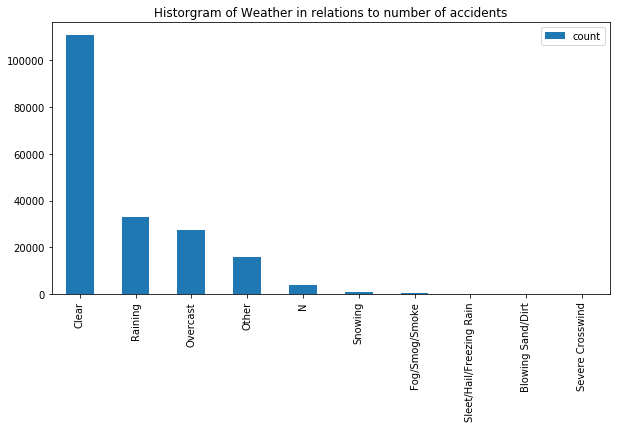

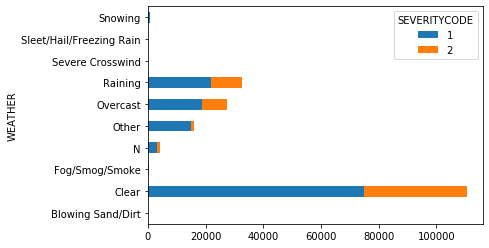

In [77]:
# sorting out weather data for plotting 
weather_data = newdata['WEATHER'].value_counts().to_frame('count') 
weather_data 
#histogram plotting for weather data 
weather_data.plot.bar(figsize=(10, 5)) 
plt.title('Historgram of Weather in relations to number of accidents') 
plt.show() 
newdata.pivot_table(index='WEATHER', 
                columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True)

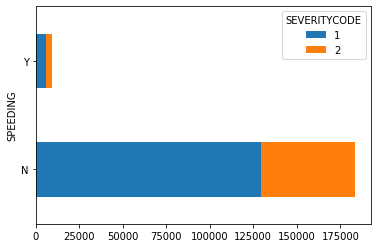

In [13]:
#looking at speeding variable 
speeding_data = newdata['SPEEDING'].value_counts().to_frame('count') 
speeding_data 
newdata.pivot_table(index='SPEEDING', 
                    columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True) 

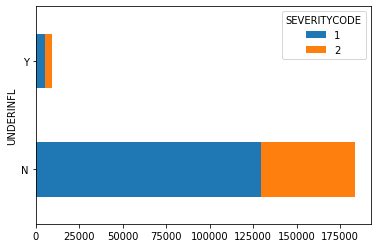

In [14]:
 #looking at underinfluence variable 
underinfluence_data = newdata['UNDERINFL'].value_counts().to_frame('count') 
underinfluence_data 
newdata.pivot_table(index='UNDERINFL', 
                    columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True)

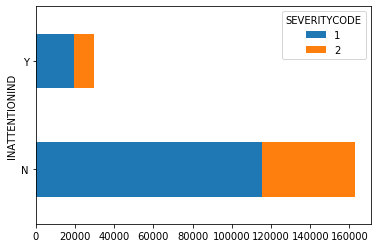

In [15]:
#looking at unattention variable 
inattention_data = newdata['INATTENTIONIND'].value_counts().to_frame('count') 
inattention_data 
newdata.pivot_table(index='INATTENTIONIND', 
               columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True) 

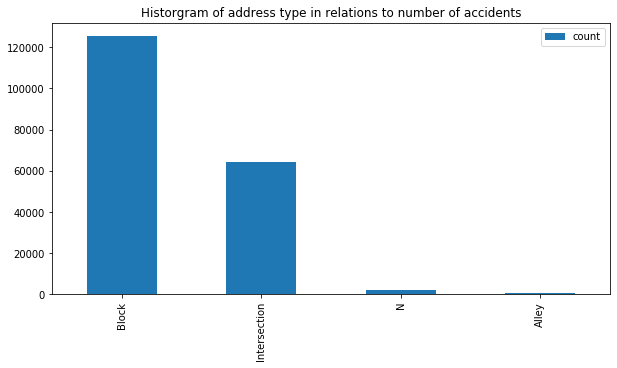

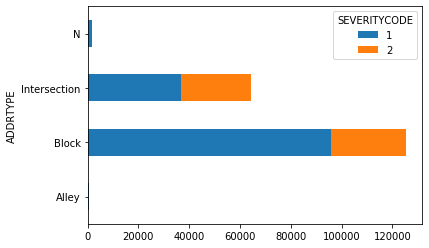

In [16]:
#looking at address type variable 
addresstype_data = newdata['ADDRTYPE'].value_counts().to_frame('count') 
addresstype_data
#histogram plotting for address type data 
addresstype_data.plot.bar(figsize=(10, 5)) 
plt.title('Historgram of address type in relations to number of accidents') 
plt.show() 
newdata.pivot_table(index='ADDRTYPE', 
               columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True)

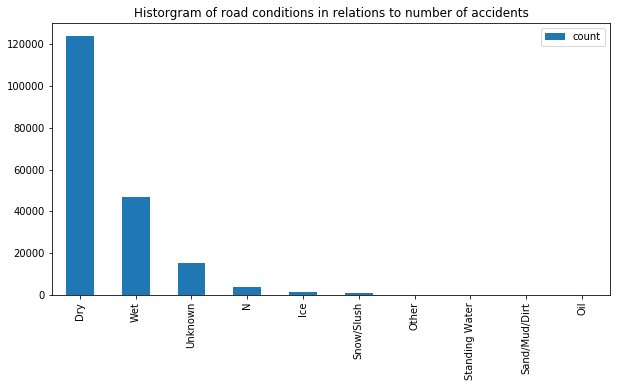

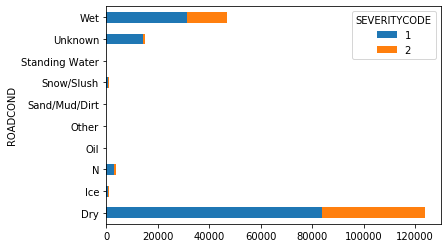

In [18]:
 #looking at road conditions variable 
roadcondition_data = newdata['ROADCOND'].value_counts().to_frame('count') 
roadcondition_data
#histogram plotting for road conditions data 
roadcondition_data.plot.bar(figsize=(10, 5)) 
plt.title('Historgram of road conditions in relations to number of accidents') 
plt.show() 
newdata.pivot_table(index='ROADCOND', 
               columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True) 

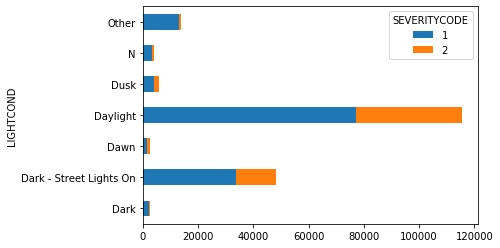

In [19]:
# sorting out light conditions data for plotting 
lighting_data = newdata['LIGHTCOND'].value_counts().to_frame('count') 
lighting_data 
newdata.pivot_table(index='LIGHTCOND', 
                    columns='SEVERITYCODE', aggfunc='size').plot.barh(stacked=True)

In [20]:
 #looking at junction type variable 
junctiontype_data = newdata['JUNCTIONTYPE'].value_counts().to_frame('count') 
junctiontype_data 

,count
Mid-Block (not related to intersection),88675
At Intersection (intersection related),61930
Mid-Block (but intersection related),22669
Driveway Junction,10568
N,6314
At Intersection (but not related to intersection),2097
Ramp Junction,166
Unknown,9


In [21]:
new=newdata.groupby(['SEVERITYCODE','UNDERINFL'])["UNDERINFL"].count() 
new 

SEVERITYCODE  UNDERINFL
1             N            129364
              Y              5559
2             N             53943
              Y              3562
Name: UNDERINFL, dtype: int64

In [97]:
 #most accidents have happened on friday 
newdata.groupby(newdata["INCDTTM"].dt.day_name())["OBJECTID"].count().to_frame()

,OBJECTID
INCDTTM,
Friday,31908
Monday,26042
Saturday,27090
Sunday,21731
Thursday,28940
Tuesday,28281
Wednesday,28436


In [98]:
 
sum=newdata.groupby(["INCDATE"])["OBJECTID"].count().to_frame() 
mean = sum.resample("M").mean().round(decimals=1) 
mean.head(10)

,OBJECTID
INCDATE,
2004-01-31 00:00:00+00:00,31.5
2004-02-29 00:00:00+00:00,30.8
2004-03-31 00:00:00+00:00,33.2
2004-04-30 00:00:00+00:00,35.1
2004-05-31 00:00:00+00:00,37.0
2004-06-30 00:00:00+00:00,36.6
2004-07-31 00:00:00+00:00,34.8
2004-08-31 00:00:00+00:00,35.2
2004-09-30 00:00:00+00:00,34.3


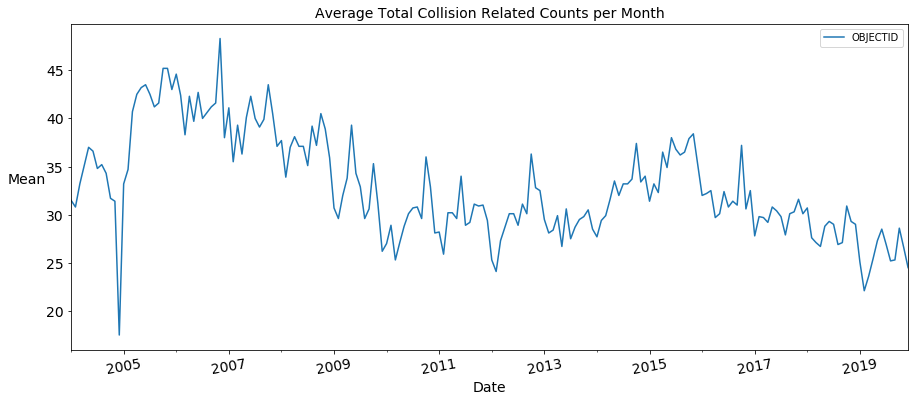

In [39]:
# compare monthly average values over time

mean.plot(figsize=(15,6));
plt.xlabel("Date", size=14);
plt.ylabel("Mean", size=14, rotation="horizontal", labelpad=20);
plt.xticks(rotation=10, ha="center", size=14);
plt.yticks(size=14);
plt.title('Average Total Collision Related Counts per Month', size=14);
plt.show();

In [26]:
newdata['INATTENTIONIND'].value_counts().to_frame('count')

,count
N,162623
Y,29805


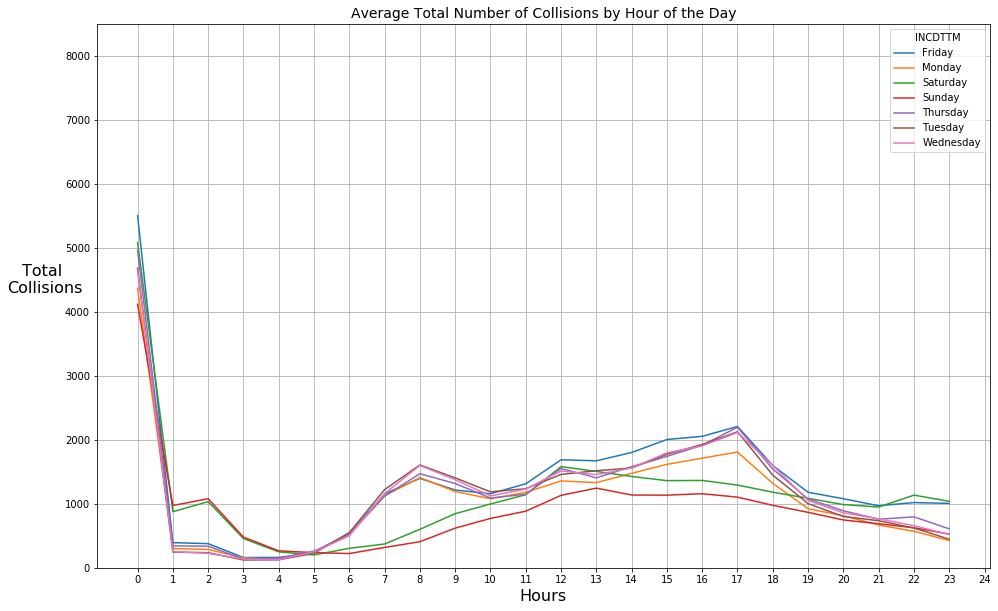

In [28]:
 #here we will look into distribution of the collisions through the day. Number of accidents per hour.  
#There is a big spike of acidents at midnight  
newdata.groupby([newdata["INCDTTM"].dt.hour, 
            newdata["INCDTTM"].dt.day_name()])["OBJECTID"].count().unstack().plot(figsize=(16,10),  
                                                                                  xticks=(list(range(0,25,1))), 
                                                                                  ylim=(0,8500), 
                                                                                  grid=True); 
plt.xlabel("Hours", size=16); 
plt.ylabel("Total \nCollisions", size=16, rotation="horizontal", labelpad=20); 
plt.title('Average Total Number of Collisions by Hour of the Day', size=14); 

In [99]:
label_encoder = preprocessing.LabelEncoder()     
# Chnaging categorical variables into numerical 
# Encode labels in columns 
newdata['ADDRTYPE']= label_encoder.fit_transform(newdata['ADDRTYPE'])  
newdata['ADDRTYPE'].unique()  
 
newdata['INATTENTIONIND']= label_encoder.fit_transform(newdata['INATTENTIONIND'])    
newdata['INATTENTIONIND'].unique() 
 
newdata['UNDERINFL']= label_encoder.fit_transform(newdata['UNDERINFL'])    
newdata['UNDERINFL'].unique() 
 
newdata['WEATHER']= label_encoder.fit_transform(newdata['WEATHER'])    
newdata['WEATHER'].unique() 
 
newdata['ROADCOND']= label_encoder.fit_transform(newdata['ROADCOND'])    
newdata['ROADCOND'].unique() 
 
newdata['LIGHTCOND']= label_encoder.fit_transform(newdata['LIGHTCOND'])    
newdata['LIGHTCOND'].unique() 

array([3, 1, 0, 6, 4, 5, 2])

In [101]:
#K Nearest Neighboor model 
X = newdata[['ADDRTYPE', 'Month', 'Weekday','Hour', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values 
X[0:5]

array([[ 2,  3,  2, 14,  0,  0,  5,  9,  3],
       [ 1, 12,  2, 18,  0,  0,  6,  9,  1],
       [ 1, 11,  3, 10,  0,  0,  5,  0,  3],
       [ 1,  3,  4,  9,  0,  0,  1,  0,  3],
       [ 2,  1,  2,  8,  0,  0,  6,  9,  3]])

In [102]:
# assigning the outcomes vaalues 
 
y = newdata['SEVERITYCODE'].values 
y[0:5] 

array([2, 1, 1, 1, 2])

In [103]:
# normalizing the data 
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 
X[0:5] 

array([[ 1.28743862, -1.05392195, -0.48819756,  0.39507051, -0.42810823,
        -0.22306514,  1.04405489,  1.49369408,  0.1984074 ],
       [-0.69225803,  1.58092401, -0.48819756,  0.96202277, -0.42810823,
        -0.22306514,  1.50958675,  1.49369408, -1.28206412],
       [-0.69225803,  1.28816335,  0.03201663, -0.17188175, -0.42810823,
        -0.22306514,  1.04405489, -0.71363674,  0.1984074 ],
       [-0.69225803, -1.05392195,  0.55223082, -0.31361981, -0.42810823,
        -0.22306514, -0.81807254, -0.71363674,  0.1984074 ],
       [ 1.28743862, -1.63944328, -0.48819756, -0.45535788, -0.42810823,
        -0.22306514,  1.50958675,  1.49369408,  0.1984074 ]])

In [104]:
 #splitting the dataset into training and testing set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) 
print ('Train set:', X_train.shape,  y_train.shape) 
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (153942, 9) (153942,)
Test set: (38486, 9) (38486,)


## K Nearest Neighboor model

In [105]:
# import the libarary 
from sklearn.neighbors import KNeighborsClassifier 

In [126]:
k = 8
#Train Model and Predict   
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train) 
neigh 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [123]:
yhatKNN = neigh.predict(X_test) 
yhatKNN[0:5]

array([1, 1, 1, 1, 1])

In [127]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train))) 
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)) 

Train set Accuracy:  0.7226487898039521
Test set Accuracy:  1.0


In [109]:
# estimating the right K  
Ks = 10 
mean_acc = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1)) 
ConfustionMx = []; 
for n in range(1,Ks): 
     
    #Train Model and Predict   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train) 
    yhatKNN=neigh.predict(X_test) 
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatKNN)       
    std_acc[n-1]=np.std(yhatKNN==y_test)/np.sqrt(yhatKNN
                                                 .shape[0])  
mean_acc

array([0.61248246, 0.6775191 , 0.63937536, 0.68022138, 0.65618667,
       0.68276776, 0.66476121, 0.68588578, 0.67253027])

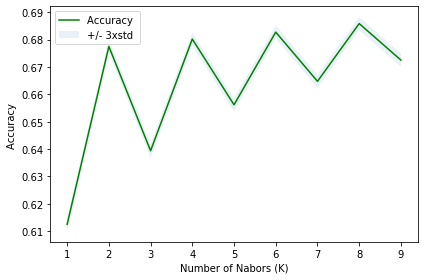

In [121]:
plt.plot(range(1,Ks),mean_acc,'g') 
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10) 
plt.legend(('Accuracy ', '+/- 3xstd')) 
plt.ylabel('Accuracy ') 
plt.xlabel('Number of Nabors (K)') 
plt.tight_layout() 
plt.show() 

## Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_test)

In [112]:
print (predTree [0:5])
print (y_test [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

[1 1 1 1 1]
[2 1 2 1 1]
DecisionTrees's Accuracy:  0.6999428363560776


## Support Vector Machine

In [113]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhatSVM = clf.predict(X_test)
yhatSVM [0:5]

array([1, 1, 1, 1, 1])

## Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
yhatLR = LR.predict(X_test)
yhatLR [0:5]

array([1, 1, 1, 1, 1])

In [116]:
yhatLR_prob = LR.predict_proba(X_test)
yhatLR_prob [0:5]

array([[0.71262147, 0.28737853],
       [0.78370481, 0.21629519],
       [0.86459477, 0.13540523],
       [0.76463056, 0.23536944],
       [0.76556118, 0.23443882]])

## Models Evaluation

In [117]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [128]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, yhatKNN))
print(jaccard_similarity_score(y_test, predTree))
print(jaccard_similarity_score(y_test, yhatLR))
print(jaccard_similarity_score(y_test, yhatSVM))

0.6725302707478044
0.6999428363560776
0.6957594969599334
0.7001766876266694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [129]:
from sklearn.metrics import f1_score
print(f1_score(y_test, yhatKNN, average='weighted') )
print(f1_score(y_test, predTree, average='weighted') )
print(f1_score(y_test, yhatLR, average='weighted') )
print(f1_score(y_test, yhatSVM, average='weighted') )

0.6366119137741079
0.5861071925325738
0.5882714668635011
0.5827914754113983


In [120]:


from sklearn.metrics import log_loss
log_loss(y_test, yhatLR_prob)



0.5880745736976761

## using the modeling without time series

In [130]:
#K Nearest Neighboor model 
X2 = newdata[['ADDRTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values 
X2[0:5]

array([[2, 0, 0, 5, 9, 3],
       [1, 0, 0, 6, 9, 1],
       [1, 0, 0, 5, 0, 3],
       [1, 0, 0, 1, 0, 3],
       [2, 0, 0, 6, 9, 3]])

In [132]:
# normalizing the data 
X2 = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 
X2[0:5]

array([[ 1.28743862, -1.05392195, -0.48819756,  0.39507051, -0.42810823,
        -0.22306514,  1.04405489,  1.49369408,  0.1984074 ],
       [-0.69225803,  1.58092401, -0.48819756,  0.96202277, -0.42810823,
        -0.22306514,  1.50958675,  1.49369408, -1.28206412],
       [-0.69225803,  1.28816335,  0.03201663, -0.17188175, -0.42810823,
        -0.22306514,  1.04405489, -0.71363674,  0.1984074 ],
       [-0.69225803, -1.05392195,  0.55223082, -0.31361981, -0.42810823,
        -0.22306514, -0.81807254, -0.71363674,  0.1984074 ],
       [ 1.28743862, -1.63944328, -0.48819756, -0.45535788, -0.42810823,
        -0.22306514,  1.50958675,  1.49369408,  0.1984074 ]])

In [145]:
 #splitting the dataset into training and testing set 
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y, test_size=0.2, random_state=4) 
print ('Train set:', X2_train.shape,  y2_train.shape) 
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (153942, 9) (153942,)
Test set: (38486, 9) (38486,)


In [146]:
k = 8
#Train Model and Predict   
neigh = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train) 
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [147]:
yhatKNN2 = neigh.predict(X2_test) 


In [148]:
# estimating the right K  
Ks = 10 
mean_acc = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1)) 
ConfustionMx = []; 
for n in range(1,Ks): 
     
    #Train Model and Predict   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train) 
    yhatKNN=neigh.predict(X2_test) 
    mean_acc[n-1] = metrics.accuracy_score(y2_test, yhatKNN2)       
    std_acc[n-1]=np.std(yhatKNN2==y2_test)/np.sqrt(yhatKNN2
                                                 .shape[0])  
mean_acc

array([0.68559996, 0.68559996, 0.68559996, 0.68559996, 0.68559996,
       0.68559996, 0.68559996, 0.68559996, 0.68559996])

In [149]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters
loanTree.fit(X2_train,y2_train)
predTree2 = loanTree.predict(X2_test)

In [150]:
clf = svm.SVC(kernel='rbf')
clf.fit(X2_train, y2_train) 
yhatSVM2 = clf.predict(X2_test)


In [151]:
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X2_train,y2_train)


In [152]:
yhatLR2 = LR2.predict(X2_test)
yhatLR_prob2 = LR2.predict_proba(X2_test)

In [154]:
print(jaccard_similarity_score(y2_test, yhatKNN2))
print(jaccard_similarity_score(y2_test, predTree2))
print(jaccard_similarity_score(y2_test, yhatLR2))
print(jaccard_similarity_score(y2_test, yhatSVM2))

0.6855999584264408
0.6999428363560776
0.6957594969599334
0.7001766876266694


In [155]:
print(f1_score(y2_test, yhatKNN2, average='weighted') )
print(f1_score(y2_test, predTree2, average='weighted') )
print(f1_score(y2_test, yhatLR2, average='weighted') )
print(f1_score(y2_test, yhatSVM2, average='weighted') )

0.6291219563425324
0.5861071925325738
0.5882714668635011
0.5827914754113983
